In [8]:
# Briann Steven Gómez - Grupo 77 - Análisis de datos
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

## 1. Análisis exploratorio de los datos

In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv('heart_cleveland_upload.csv')


## 2. Preprocesamiento de datos

In [3]:
# Preprocesamiento
X = Datos.drop(columns='condition')
y = Datos['condition']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=300, stratify=y)

## 3. Características más relevantes

In [4]:
# Entrenar modelo
model = LogisticRegression(max_iter=500, random_state=300)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=300)

## 4. Entrenar el modelo

In [5]:
# Predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

## 5. Evaluar el desempeño del modelo

In [6]:
# Evaluación
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred_proba))

Confusion Matrix:
 [[13  3]
 [ 1 13]]
Accuracy: 0.8666666666666667
Precision: 0.8125
Recall: 0.9285714285714286
F1 Score: 0.8666666666666666
ROC AUC: 0.9508928571428572


## 6. Gráficos de resultados

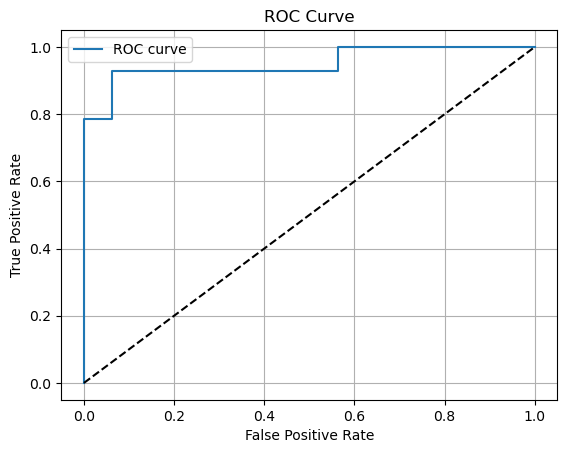

In [7]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## 7. Interpretación de resultados

- Accuracy: La precisión general del modelo es del 86.67%, lo que indica que el modelo acierta en aproximadamente 87 de cada 100 predicciones.
- Precision: La precisión positiva es del 81.25%, lo que significa que, de cada 100 predicciones positivas realizadas por el modelo, 81 son correctas. Esto sugiere que el modelo puede tener una cierta tendencia a producir falsos positivos.
- Recall: La sensibilidad o recall es del 92.86%, lo que indica que el modelo detecta correctamente aproximadamente 93 de cada 100 casos positivos. Esto sugiere que el modelo es bueno para detectar casos positivos.
- F1 Score: El F1 Score es una media armónica de la precisión y la sensibilidad. Un valor de 0.8667 indica un buen equilibrio entre precisión y sensibilidad.
- ROC AUC: El área bajo la curva ROC es del 95.09%, lo que indica una excelente capacidad del modelo para distinguir entre casos positivos y negativos.